<a href="https://colab.research.google.com/github/Ailton3112/glp/blob/main/RevGas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise Exploratória de dados de Pedidos de Revenda Gás
By:Ailton Rodrigues 
<img src="https://app.revgas.com/ng/assets/img/logo.png" align="left">  





###Importação de bibliotecas e Etapa de pré-processamento
---

In [ ]:
import pandas as pd
!pip install dash
import dash
import dash_core_components as dcc
#import dash_html_components as html
from dash import html
from dash.dependencies import Input,Output
import plotly.express as px
import matplotlib.pyplot as plt

     |████████████████████████████████| 7.3 MB 3.9 MB/s 
     |████████████████████████████████| 26.5 MB 1.3 MB/s 
     |████████████████████████████████| 357 kB 60.0 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3822 sha256=59b0e3c88c4808d8f00b41aff23c44439d47ba4c0d014d8778814120fad2e56b
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4090 sha256=26dca6bdfd6fd9d6563140fcc8a9fe4e55ea05a18380577ab34ad3b42d2c00eb
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3912 sha256=ef6f51294e45b4cc253100591220d71e17180c1a8d94dcec62b4563d0523aebb
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aef

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  after removing the cwd from sys.path.


#### Seta pasta do GD
---

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Carrega arquivo .csv específico de um cliente
---

In [ ]:
revgas = pd.read_csv('/content/gdrive/MyDrive/REVGAS/dados/33528.csv', delimiter = ';')

revgas['data'] = pd.to_datetime(revgas['data'])

#revgas = pd.read_csv('/content/gdrive/MyDrive/REVGAS/dados/33528.csv',parse_dates=[data])

revgas

,cliente,data,produto,quantidade,valor,cidade,estado
0,33528,2013-08-11 17:25:54,GLP 13KG,1,45.0,Teresina,Piauí
1,33528,2013-10-06 18:44:26,GLP 13KG,1,45.0,Teresina,Piauí
2,33528,2013-11-01 16:58:39,GLP 13KG,1,45.0,Teresina,Piauí
3,33528,2013-12-26 22:31:49,GLP 13KG,1,50.0,Teresina,Piauí
4,33528,2013-12-30 22:48:56,GLP 13KG,1,50.0,Teresina,Piauí
...,...,...,...,...,...,...,...
186,33528,2021-07-22 20:37:06,GLP 13KG,1,110.0,Teresina,Piauí
187,33528,2021-08-06 10:21:19,GLP 13KG,1,110.0,Teresina,Piauí
188,33528,2021-08-20 17:33:32,GLP 13KG,1,110.0,Teresina,Piauí
189,33528,2021-09-13 21:29:03,GLP 13KG,1,110.0,Teresina,Piauí


#### Carrega arquivo consolidado .csv de todos os clientes
---

In [ ]:
revgas_a = pd.read_csv('/content/gdrive/MyDrive/REVGAS/dados/combined.csv', delimiter = ';')

revgas_a['data'] = pd.to_datetime(revgas_a['data'],dayfirst=True, errors='coerce')


#revgas_a['data'] = pd.to_datetime(revgas_a['data'],dayfirst=True, errors='coerce')#
revgas_a['data'] = pd.to_datetime(revgas_a['data'], format='%Y/%m/%d %H:%M:%S') 
#revgas_a['data'] = pd.to_datetime(revgas_a['data'])

#revgas_all = pd.read_csv('/content/gdrive/MyDrive/REVGAS/dados/combined.csv',parse_dates=["data"])



In [ ]:
print ('Quantidade de linhas e colunas', revgas_a.shape)

Quantidade de linhas e colunas (910, 7)


#### Data Inicial
---

In [ ]:
revgas_a["data"].min()

Timestamp('2013-02-21 08:46:22')

#### Data Final
---

In [ ]:
revgas_a["data"].max()

Timestamp('2021-10-01 21:25:25')

#### Quantidade total de Dias de Pedidos
---

In [ ]:
revgas_a["data"].max()-revgas_a["data"].min()

Timedelta('3144 days 12:39:03')

#### Verifica se tem dados nulos
---

In [ ]:
print ('Quantidade de dado nulos',revgas_a.isna().sum().sum())

Quantidade de dado nulos 2


#### Tipos de dados
---

In [ ]:
revgas_a.dtypes

cliente                int64
data          datetime64[ns]
produto               object
quantidade             int64
valor                float64
cidade                object
estado                object
dtype: object

In [ ]:
revgas_a['cidade'] = revgas_a['cidade'].astype("|S")
#revgas_a['data'] = pd.to_datetime(revgas_a['data'])
# Create novas colunas
revgas_a['dia']    = revgas_a['data'].dt.day
revgas_a['mes']    = revgas_a['data'].dt.month
revgas_a['ano']    = revgas_a['data'].dt.year
revgas_a['hora']   = revgas_a['data'].dt.hour
revgas_a['minuto'] = revgas_a['data'].dt.minute
revgas_a

,cliente,data,produto,quantidade,valor,cidade,estado,dia,mes,ano,hora,minuto
0,29426,2013-02-21 08:46:22,GLP 13KG,1,45.0,b'Teresina',Piauí,21,2,2013,8,46
1,29426,2013-02-26 11:48:27,GLP 13KG,1,45.0,b'Teresina',Piauí,26,2,2013,11,48
2,29426,2013-03-01 10:13:34,GLP 13KG,1,45.0,b'Teresina',Piauí,1,3,2013,10,13
3,29426,2013-03-06 10:38:09,GLP 13KG,1,45.0,b'Teresina',Piauí,6,3,2013,10,38
4,29426,2013-03-08 22:14:24,GLP 13KG,1,45.0,b'Teresina',Piauí,8,3,2013,22,14
...,...,...,...,...,...,...,...,...,...,...,...,...
905,33528,2021-07-22 20:37:06,GLP 13KG,1,110.0,b'Teresina',Piauí,22,7,2021,20,37
906,33528,2021-08-06 10:21:19,GLP 13KG,1,110.0,b'Teresina',Piauí,6,8,2021,10,21
907,33528,2021-08-20 17:33:32,GLP 13KG,1,110.0,b'Teresina',Piauí,20,8,2021,17,33
908,33528,2021-09-13 21:29:03,GLP 13KG,1,110.0,b'Teresina',Piauí,13,9,2021,21,29


## Pedidos por Dia da Semana 
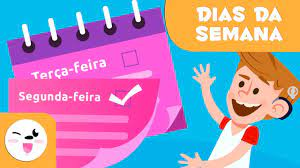

### Dados

In [ ]:
revgas_Dia_semana_intervalo_data = revgas_a.groupby([revgas_a["cliente"],revgas_a["data"].dt.weekday])["quantidade"].count()
revgas_Dia_semana_intervalo_data


cliente  data
29426    0       24
         1       32
         2       33
         3       22
         4       37
         5       34
         6        1
29463    0       36
         1       26
         2       35
         3       28
         4       26
         5       21
         6        9
29477    0       27
         1       28
         2       28
         3       22
         4       32
         5       34
         6       12
29830    0       22
         1       29
         2       32
         3       29
         4       23
         5       29
         6        8
33528    0       33
         1       32
         2       28
         3       33
         4       30
         5       15
         6       20
Name: quantidade, dtype: int64

### Gráfico

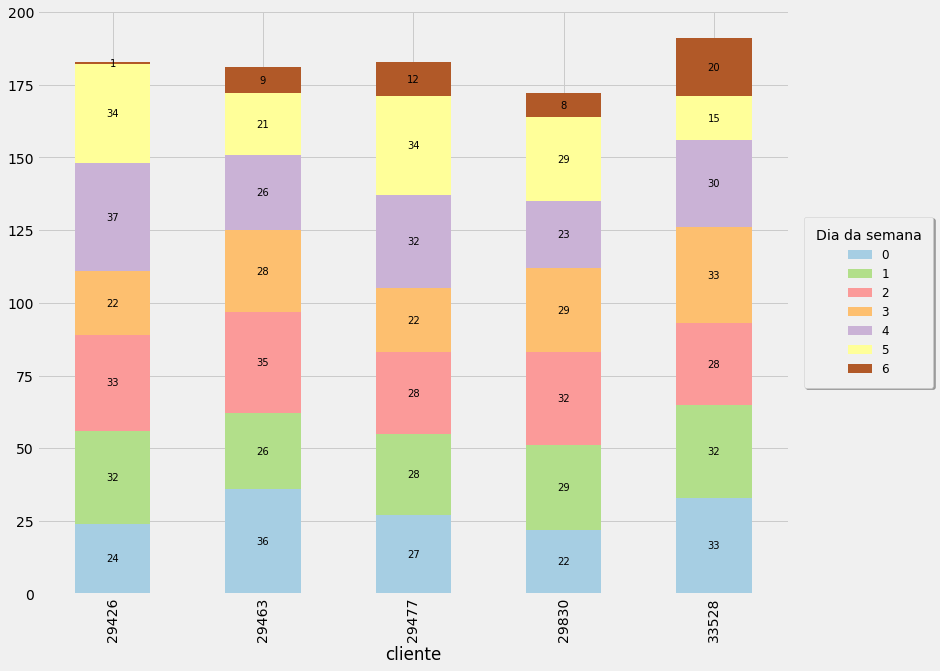

In [ ]:
plt.style.use('fivethirtyeight')

revgas_Dia_semana_intervalo_data = revgas_a.groupby([revgas_a["cliente"],revgas_a["data"].dt.weekday])["quantidade"].count().unstack().plot(kind='bar',colormap='Paired',stacked=True,figsize=(12, 10))
#plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
#revgas_Mes_intervalo_data = revgas.groupby([revgas["data"].dt.month])["quantidade"].sum().diff()
plt.legend(shadow=True, borderpad=1,loc='right', ncol=1, prop={'size':12}, bbox_to_anchor=(1.2, 0.5), title='Dia da semana',fontsize=18)

ax= revgas_Dia_semana_intervalo_data 

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.0f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)


plt.show()



## Pedidos por Mês 
---
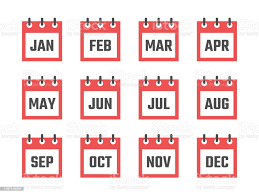

### Dados

In [ ]:
revgas_Mes_intervalo_data = revgas_a.groupby([revgas_a["dia"]])["quantidade"].count().sort_values(ascending=False)
revgas_Mes_intervalo_data
# Salva resultados para arquivo .csv
#revgas_Mes_intervalo_data.to_csv("/content/gdrive/MyDrive/REVGAS/pedidos_mes.csv")

NameError: ignored

### Gráfico 

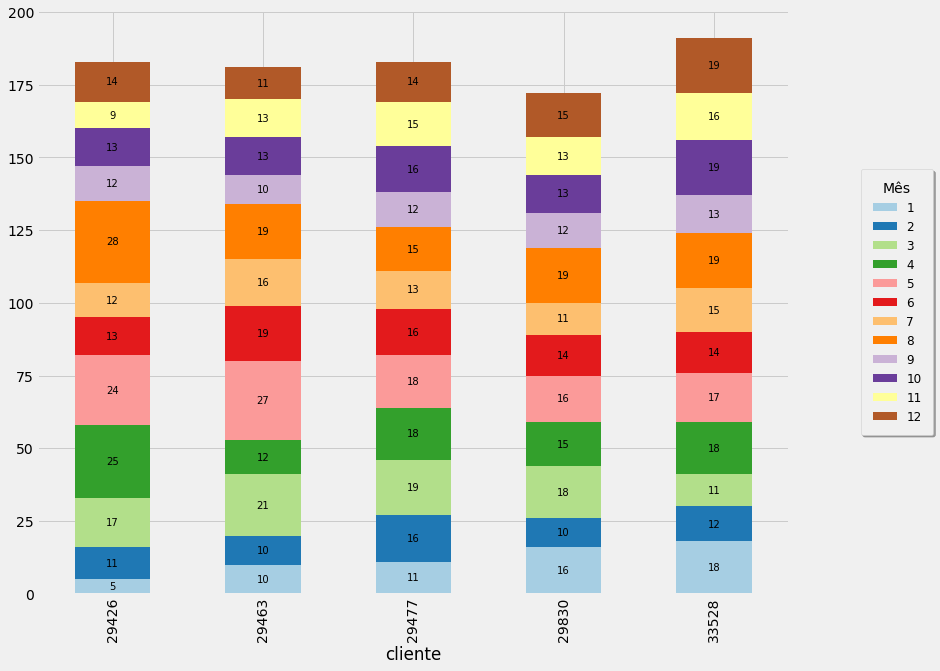

In [ ]:
plt.style.use('fivethirtyeight')

revgas_Mes_intervalo_data = revgas_a.groupby([revgas_a["cliente"],revgas_a["mes"]])["quantidade"].count().unstack().plot(kind='bar',colormap='Paired',stacked=True,figsize=(12, 10))
#plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
#revgas_Mes_intervalo_data = revgas.groupby([revgas["data"].dt.month])["quantidade"].sum().diff()
plt.legend(shadow=True, borderpad=1,loc='right', ncol=1, prop={'size':12}, bbox_to_anchor=(1.2, 0.5), title='Mês',fontsize=18)

ax= revgas_Mes_intervalo_data

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.0f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)


plt.show()



<iframe width="600" height="371" seamless frameborder="0" scrolling="no" src="https://docs.google.com/spreadsheets/d/e/2PACX-1vR8oqwpKkUvWzhwyTrhN8KqYmRy0cbI1_PB5iSSEAbPzs5a5XNYb_aX84SIqE-HpbT1oyJCYZ_IK0ci/pubchart?oid=1565121367&amp;format=image"></iframe>

<img src="https://docs.google.com/spreadsheets/d/e/2PACX-1vR8oqwpKkUvWzhwyTrhN8KqYmRy0cbI1_PB5iSSEAbPzs5a5XNYb_aX84SIqE-HpbT1oyJCYZ_IK0ci/pubchart?oid=1565121367&amp;format=image" align="left"> 

<iframe width="600" height="371" seamless frameborder="0" scrolling="no" src="https://docs.google.com/spreadsheets/d/e/2PACX-1vR8oqwpKkUvWzhwyTrhN8KqYmRy0cbI1_PB5iSSEAbPzs5a5XNYb_aX84SIqE-HpbT1oyJCYZ_IK0ci/pubchart?oid=1565121367&amp;format=interactive"></iframe>

## Pedidos por Dia do Mês
---
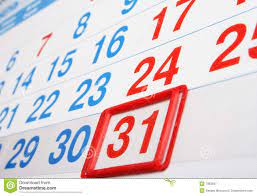

### Dados

In [ ]:
revgas_Mes_Dia_semana_intervalo_data = revgas_a.groupby([revgas_a['mes'],revgas_a['dia']])["quantidade"].count()
#plt.legend(shadow=True, borderpad=1,loc='right', ncol=1, prop={'size':12}, bbox_to_anchor=(1.2, 0.5), title='Mês',fontsize=18)

revgas_Mes_Dia_semana_intervalo_data.head(60)

mes  dia
1    2      3
     3      1
     4      2
     5      3
     6      2
     7      3
     8      1
     11     2
     12     1
     13     2
     14     2
     16     2
     18     3
     19     3
     20     1
     22     4
     23     2
     24     1
     25     4
     26     5
     28     4
     29     1
     30     4
     31     4
2    1      2
     3      4
     4      2
     5      3
     6      1
     7      2
     8      1
     9      1
     10     1
     11     2
     12     3
     13     1
     14     1
     15     1
     16     1
     17     4
     18     1
     19     1
     20     3
     21     3
     22     2
     23     4
     24     2
     25     2
     26     6
     27     2
     28     3
3    1      6
     2      1
     3      2
     4      1
     5      2
     6      3
     7      1
     8      4
     9      5
Name: quantidade, dtype: int64

### Gráfico

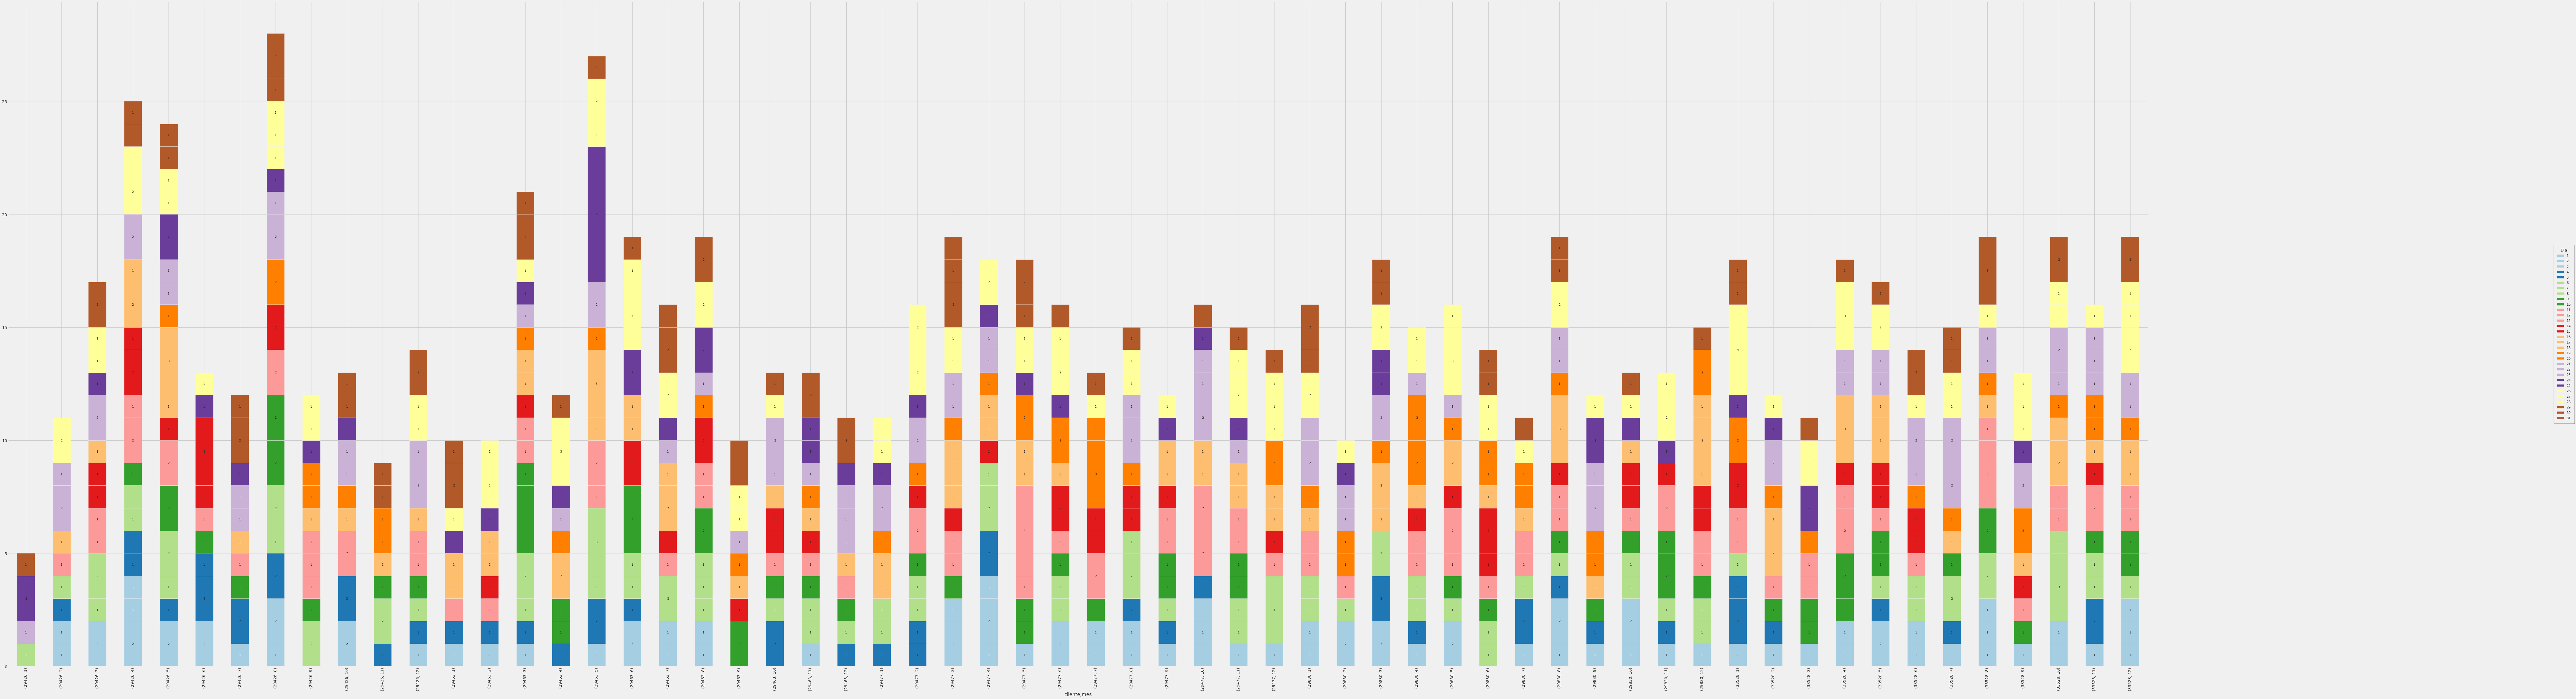

In [ ]:
plt.style.use('fivethirtyeight')

revgas_Mes_Dia_semana_intervalo_data = revgas_a.groupby([revgas_a['cliente'],revgas_a['mes'],revgas_a['dia']])["quantidade"].count().unstack().plot(kind='bar',colormap='Paired',stacked=True,figsize=(120, 40))

#plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
#revgas_Mes_intervalo_data = revgas.groupby([revgas["data"].dt.month])["quantidade"].sum().diff()
plt.legend(shadow=True, borderpad=1,loc='right', ncol=1, prop={'size':12}, bbox_to_anchor=(1, 0.5), title='Dia',fontsize=18)

ax= revgas_Mes_Dia_semana_intervalo_data

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.0f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)


plt.show()



## *Pedidos* por Ano 
---
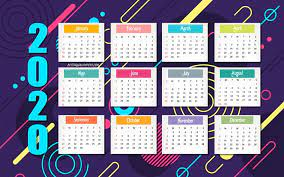

###Dados

In [ ]:
revgas_Mes_Ano_intervalo_data = revgas_a.groupby([revgas_a['cliente'],revgas_a["ano"]])["quantidade"].sum()
revgas_Mes_Ano_intervalo_data

cliente  ano 
29426    2013    114
         2014     71
         2019      1
29463    2013      1
         2014     26
         2015     70
         2016     14
         2017     58
         2018      5
         2021      7
29477    2013     28
         2014     20
         2015     22
         2016     21
         2017     19
         2018     20
         2019     19
         2020     20
         2021     14
29830    2013     15
         2014     15
         2015     18
         2016     20
         2017     19
         2018     26
         2019     22
         2020     23
         2021     14
33528    2013      5
         2014     30
         2015     31
         2016     26
         2017     17
         2018     29
         2019     16
         2020     16
         2021     21
Name: quantidade, dtype: int64

### Gráfico

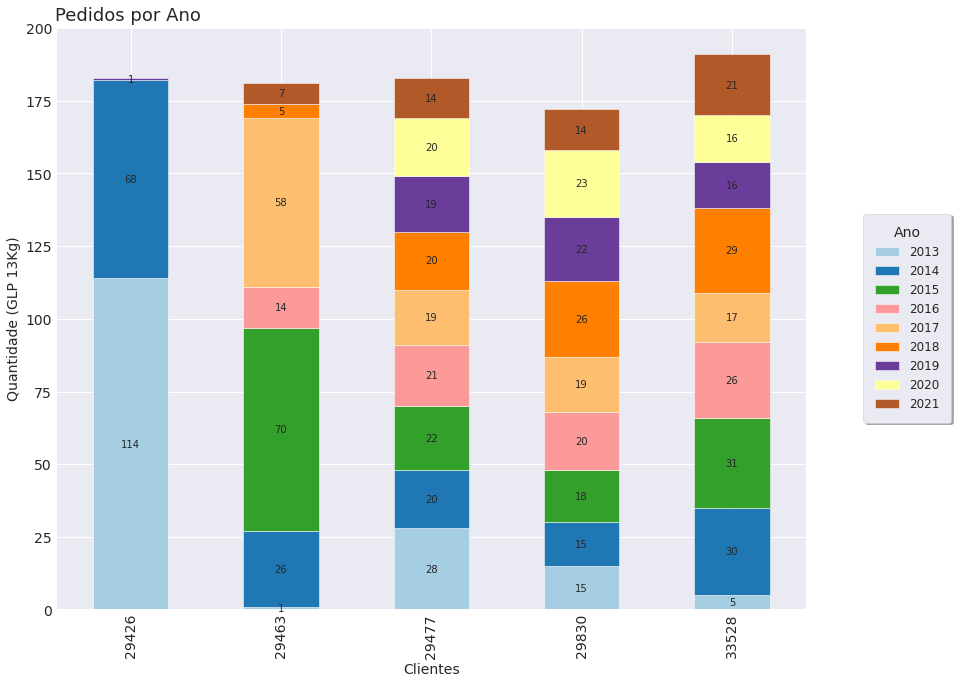

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
#plt.style.use('ggplot')

revgas_Mes_Ano_intervalo_data = revgas_a.groupby([revgas_a['cliente'],revgas_a["ano"]])["quantidade"].count().unstack().plot(kind='bar',colormap='Paired',stacked=True,figsize=(12, 10))
#revgas_Mes_Ano_intervalo_data.plot()
#plt.style.use('fivethirtyeight')

plt.xlabel('Clientes',fontsize=14)
plt.ylabel('Quantidade (GLP 13Kg)',fontsize=14)
plt.title('Pedidos por Ano',fontsize=18, loc='left');
plt.legend(shadow=True, borderpad=1,loc='right', ncol=1, prop={'size':12}, bbox_to_anchor=(1.2, 0.5), title='Ano',fontsize=18)

ax= revgas_Mes_Ano_intervalo_data

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.0f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
    
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
plt.show()


## Consumo por Ano, mês e dia 

---


In [ ]:
revgas_Ano_Mes_Dia_intervalo_data = revgas.groupby([revgas["data"].dt.year, revgas["data"].dt.month,revgas["data"].dt.weekday,"cliente","cidade","estado"])["quantidade"].sum()
revgas_Ano_Mes_Dia_intervalo_data

data  data  data  cliente  cidade    estado
2013  8     6     33528    Teresina  Piauí     1
      10    6     33528    Teresina  Piauí     1
      11    4     33528    Teresina  Piauí     1
      12    0     33528    Teresina  Piauí     1
            3     33528    Teresina  Piauí     1
                                              ..
2021  7     2     33528    Teresina  Piauí     1
            3     33528    Teresina  Piauí     1
      8     4     33528    Teresina  Piauí     2
      9     0     33528    Teresina  Piauí     1
            6     33528    Teresina  Piauí     1
Name: quantidade, Length: 155, dtype: int64

In [ ]:
# Salva resultados para arquivo .csv
revgas_Ano_Mes_Dia_intervalo_data.to_csv("/content/gdrive/MyDrive/REVGAS/revgas_ano_mes_dia.csv")

# Salva resultados para arquivo .pkl
#revgas_panorama_cliente.to_pickle("/content/gdrive/MyDrive/REVGAS/revgas_ano_mes_dia.pkl")

# Ler arquivo .pkl
#df2 = pd.read_pickle('/content/gdrive/MyDrive/REVGAS/revgas.pkl')
